![](./figures/Logo.PNG)

Please click the <span>&#x23E9;</span> button to run all cells before you start working on the notebook ...

## In this part of the tutorial, you will...
- learn how different processes dominate different environmental systems
- select, read and visualize data from a global environmental dataset
- think about consequences of environmental difference for environmental modelling

---

# Tutorial 1c - Different hydrologic systems at the catchment scale

---

## 1. Hydrologic systems and climate

The [Caravan dataset](https://www.nature.com/articles/s41597-023-01975-w) combines hydrology data for 2532 catchments around the world. It includes meteorological forcing, streamflow, and static catchment attributes (e.g., geophysical, sociological, climatological). For more information, read [the publication by Kratzert et al. (2022)](https://www.nature.com/articles/s41597-023-01975-w) or check out the [global dataset](https://zenodo.org/record/7944025).

Here we use three hydrologic systems from the US (Santa Cruz Creek, CA, and Siletz River, OR) and Canada (Trout River, BC) from the Caravan dataset. 

<figure>
    <img src="./figures/caravan_selected_catchments_hydrographs.PNG" style="width:50%">
    <figcaption>Selected catchments from Caravan in USA and Canada with conceptual hydrographs</figcaption>
</figure>

These systems are located in different hydrologic regions: temparate, arid and cold.  

**Temperate hydrologic regions** are areas with a temperate climate that experience a moderate amount of precipitation throughout the year. These regions are characterized by mild temperatures and four distinct seasons. The temperate climate occurs in the middle latitudes.

**Arid hydrologic regions** are areas with a dry climate that receive very little precipitation throughout the year. These regions are characterized by high temperatures and low humidity. The hydrological cycle in arid regions is driven by evaporation. Although arid regions receive little precipitation, when it does rain, it often falls in intense bursts, leading to flash floods.

**Cold regions** experience snow fall and snow accumulation during the winter, followed by snow melt in spring, causing increased river discharge.

### Hydrologic terms for this tutorial

- **Aridity**: relation of energy to water (e.g., expressed as precipitation/potential evapotranspiration)
- **Runoff**: water discharged in surface streams, potentially fed by small channels, interflow of infiltrated water and groundwater discharging into the stream
- **Baseflow**: streamflow from deep and shallow subsurface 
- **Basin/Catchment**: area of land where water flows (at surface and/or in subsurface) and may gather in streams or rivers. Basins of surface flow are mostly constrained by topography, groundwater basins may drain differently, e.g., through cracks and faults.

- - -

## 2. Different hydrologic systems

When developing a model or investigating model behaviour, it is essential to understand what kind of system the model is expected to represent.
Hence, when modeling river runoff in hydrologic systems, we may ask ourselves: What climates impact the modeled catchment? Do we expect to see seasonal patterns? Do we expect snow to impact the flow? 

**Import packages**

In [1]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pandas as pd
from matplotlib.lines import Line2D
from ipywidgets import interact, Dropdown, DatePicker, Checkbox, GridBox

**Create and display dropdown menu for selecting catchment**

Here, you can select the catchment and period you want to plot below.

In [2]:
# DO NOT ALTER! code to select the catchment and date range

catchment_names = ["Medina River, TX, USA", "Siletz River, OR, USA", "Trout River, BC, Canada"]
dropdown = Dropdown(
    options=catchment_names,
    value=catchment_names[0],
    description='Catchment:',
    disabled=False)

date_picker_start = DatePicker(
    description = "Start date",
    value = datetime.datetime(2002, 1, 1)) # min: 1981, 1, 1

date_picker_end = DatePicker(
    description = "End date",
    value = datetime.datetime(2002, 12, 31)) # max: 2020, 12, 31

GridBox([dropdown, date_picker_start, date_picker_end])

GridBox(children=(Dropdown(description='Catchment:', options=('Medina River, TX, USA', 'Siletz River, OR, USA'…

**Read catchment data**

In [3]:
# Get values from widgets (checkbox, dropdown and datepickers)
catchment_name = dropdown.value
start_date = date_picker_start.value
end_date = date_picker_end.value

# Read catchment data
file_dic = {catchment_names[0]: "camels_08178880", catchment_names[1]: "camels_14305500", catchment_names[2]: "hysets_10BE007"}
df = pd.read_csv(f"data/{file_dic[catchment_name]}.csv")
# Make sure the date is interpreted as a datetime object -> makes temporal operations easier
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
# Index frame by date
df.set_index('date', inplace=True)

# Select snow, precip, PET, streamflow and T
df = df[["total_precipitation_sum", "potential_evaporation_sum", "streamflow", "temperature_2m_mean"]]
# Rename variables
df.columns = ["P [mm/day]", "PET [mm/day]", "Q [mm/day]", "T [C]"]

# Select time frame
df = df[start_date:end_date]
# Reformat the date for plotting
df["Date"] = df.index.map(lambda s: s.strftime('%b-%d-%y'))

**Plot catchment data**

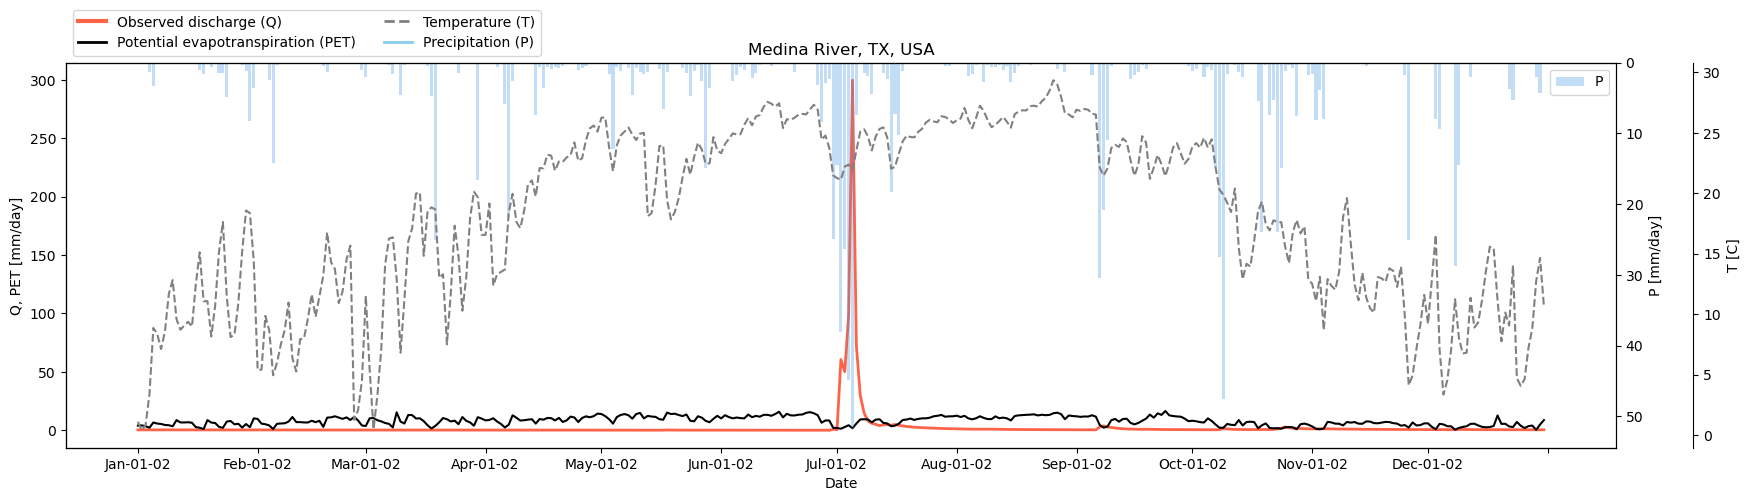

In [4]:
# Create a custom sized figure
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

# Plot the runoff (Q) and potential evapotranspiration (PET) and snow
sns.lineplot(data=df, x="Date", y="Q [mm/day]", ax=ax, label="Q", legend=False, color="tomato", linewidth=2)
sns.lineplot(data=df, x="Date", y="PET [mm/day]", ax=ax, label="PET", legend=False, color="black")

# Get the right hand side second y-axis and plot the precipitation as inverted bars
a1 = ax.twinx()
sns.barplot(data=df, x="Date", y="P [mm/day]", ax=a1, label="P", color="dodgerblue", alpha=0.3)
a1.invert_yaxis()

# Get another right hand side y-axis and plot temperature
a2 = ax.twinx() # creation
a2.spines.right.set_position(("axes", 1.05)) # position
sns.lineplot(data=df, x="Date", y="T [C]", ax=a2, label="T [°C]", legend=False, color="grey", linestyle="--") #  you can comment out a line by placing a # infront of it

# Show only the main ticks
locator = mdate.MonthLocator()
plt.gca().xaxis.set_major_locator(locator)

# Rename the y-axis, set title and set the position of the legend
ax.set_ylabel("Q, PET [mm/day]")
ax.set_title(catchment_name)

custom_lines = [Line2D([0], [0], color="tomato", lw=3),
                Line2D([0], [0], color="black", lw=2),
                Line2D([0], [0], color="grey", lw=2, linestyle="--"),
                Line2D([0], [0], color="skyblue", lw=2)]

ax.legend(custom_lines, ['Observed discharge (Q)','Potential evapotranspiration (PET)','Temperature (T)', 'Precipitation (P)'], bbox_to_anchor=(0, 1, 1, 0), loc="lower left", ncols=2)

# Display the figure
plt.show()

<div style="background:#e0f2fe; padding:1%; border:1mm solid SkyBlue">
    <h4><span>&#129300 </span>Your Turn I: Different Hydrological Systems</h4>
    <ol>
        <li>How might possible datsets to run and evaluate a model vary across the three catchments? </li>
        <li>How might simulation models to represent these systems vary? Which processes are most important to represent?</li>
        <li>What uncertainties do you think are most critical?</li>
    </ol>
    Additional Assignments
    <ol start=4>
        <li>Change the year of the data you are looking at. How does catchment behavior change over time? Try different years (data is available from 1981-01-01 to 2020-12-31).</li>
        <li>What processes might be important if we were to model biodiversity / stream temperature / precipitation intensity?</li>
    </ol>
</div>